## **Importing Dependencies**

In [1]:
# Audio Processing
import librosa

# Playing Audio
import IPython.display as ipd

# Array Processing
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt

# Training
from tensorflow import keras

import os, random, warnings
warnings.filterwarnings("ignore")

In [2]:
!unzip "AUDIO_DATASET.zip"

Archive:  AUDIO_DATASET.zip
  inflating: AUDIO DATASET/DOGS/dog_barking_81.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_105.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_84.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_91.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_86.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_97.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_87.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_112.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_82.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_89.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_104.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_96.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_109.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_88.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_107.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_108.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_94.wav  
  inflating: AUDIO DATASET/DOGS/dog_barking_103.wav  
  inflating

## **Functions for Feature Extraction**

In [2]:
# Get min and max values to normalize colormap between subplots
def get_minmax(array1, array2):
  max1 = array1.max(axis=1).max()
  max2 = array2.max(axis=1).max()
  if max1 > max2:
    max = max1
  else: max = max2

  min1 = array1.min(axis=1).min()
  min2 = array2.min(axis=1).min()
  if min1 < min2:
    min = min1
  else: min = min2

  return [min, max]

def get_mfcc(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=0, duration=30)
  mfcc = np.array(librosa.feature.mfcc(y=y, sr=sr))
  return mfcc

def get_melspectrogram(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=0, duration=30)
  melspectrogram = np.array(librosa.feature.melspectrogram(y=y, sr=sr))
  return melspectrogram

def get_chroma_vector(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  chroma = np.array(librosa.feature.chroma_stft(y=y, sr=sr))
  return chroma

def get_tonnetz(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  tonnetz = np.array(librosa.feature.tonnetz(y=y, sr=sr))
  return tonnetz

def get_feature(file_path):
  # Extracting MFCC feature
  mfcc = get_mfcc(file_path)
  mfcc_mean = mfcc.mean(axis=1)
  mfcc_min = mfcc.min(axis=1)
  mfcc_max = mfcc.max(axis=1)
  mfcc_feature = np.concatenate( (mfcc_mean, mfcc_min, mfcc_max) )

  # Extracting Mel Spectrogram feature
  melspectrogram = get_melspectrogram(file_path)
  melspectrogram_mean = melspectrogram.mean(axis=1)
  melspectrogram_min = melspectrogram.min(axis=1)
  melspectrogram_max = melspectrogram.max(axis=1)
  melspectrogram_feature = np.concatenate( (melspectrogram_mean, melspectrogram_min, melspectrogram_max) )

  # Extracting chroma vector feature
  chroma = get_chroma_vector(file_path)
  chroma_mean = chroma.mean(axis=1)
  chroma_min = chroma.min(axis=1)
  chroma_max = chroma.max(axis=1)
  chroma_feature = np.concatenate( (chroma_mean, chroma_min, chroma_max) )

  # Extracting tonnetz feature
  tntz = get_tonnetz(file_path)
  tntz_mean = tntz.mean(axis=1)
  tntz_min = tntz.min(axis=1)
  tntz_max = tntz.max(axis=1)
  tntz_feature = np.concatenate( (tntz_mean, tntz_min, tntz_max) )

  feature = np.concatenate((melspectrogram_mean, mfcc_feature))
  return feature

In [8]:
def sbplt_graph(index, title, array, x="Time", y=None, ticks=None, label=None, min=None, max=None, inv=False):
  plt.subplot(2, 2, index)
  plt.title(title)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.imshow(array, interpolation='nearest', aspect='auto', vmin=min, vmax=max)
  if ticks != None:
    plt.yticks(ticks[0],ticks[1])
  if label != None:
    plt.colorbar(label=label)
  if inv:
    plt.gca().invert_yaxis()


## **Animal Sound Visualization**

### ***Cat Waveform***

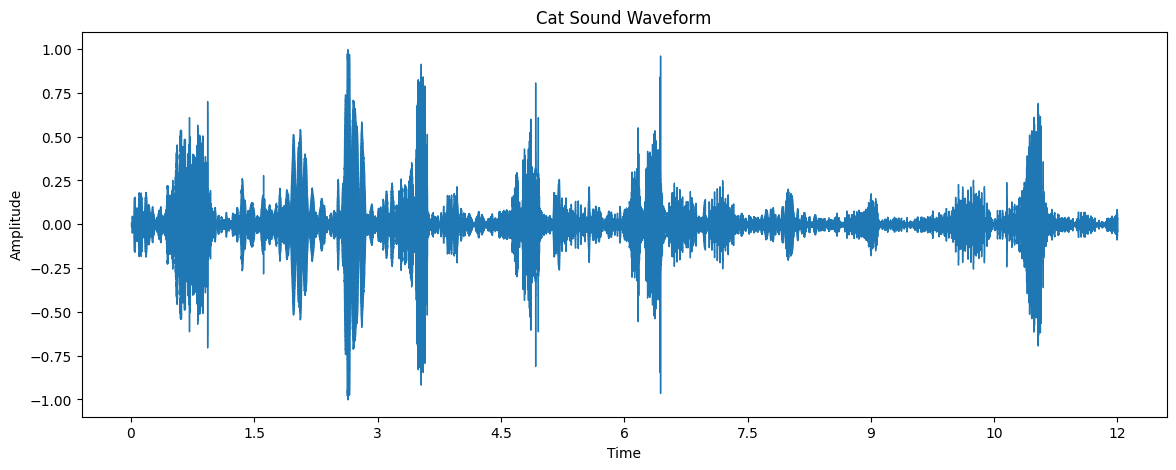

In [4]:
cat_file = f"/content/AUDIO DATASET/CAT/{random.choice(os.listdir('/content/AUDIO DATASET/CAT'))}"
plt.figure(figsize=(14,5))
plt.ylabel("Amplitude")
plt.title("Cat Sound Waveform")
data, sample_rate = librosa.load(cat_file)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(cat_file)

### ***Dog Waveform***

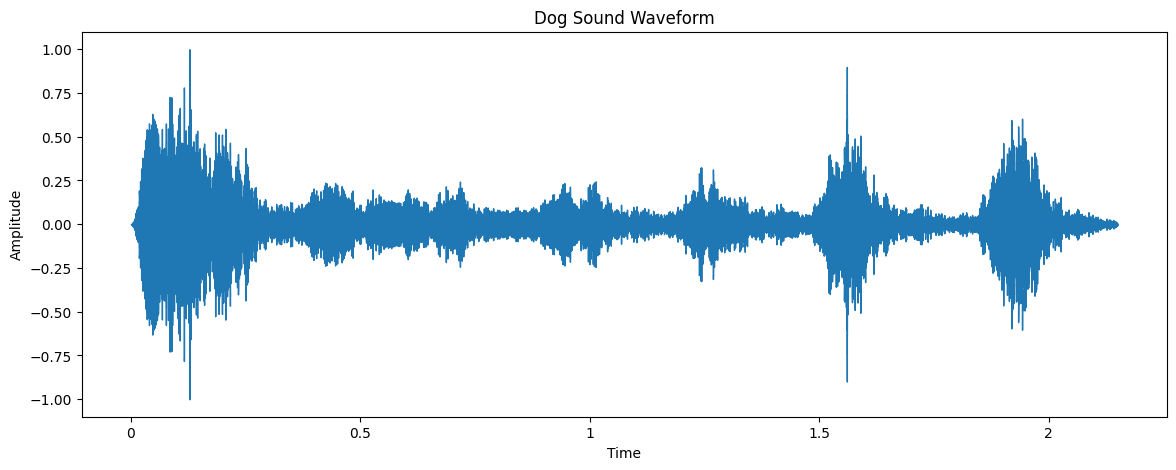

In [5]:
dog_file = f"/content/AUDIO DATASET/DOGS/{random.choice(os.listdir('/content/AUDIO DATASET/DOGS'))}"
plt.figure(figsize=(14,5))
plt.ylabel("Amplitude")
plt.title("Dog Sound Waveform")
data, sample_rate = librosa.load(dog_file)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(dog_file)

### ***Mel Frequency Cepstral Coefficients (MFCC)***

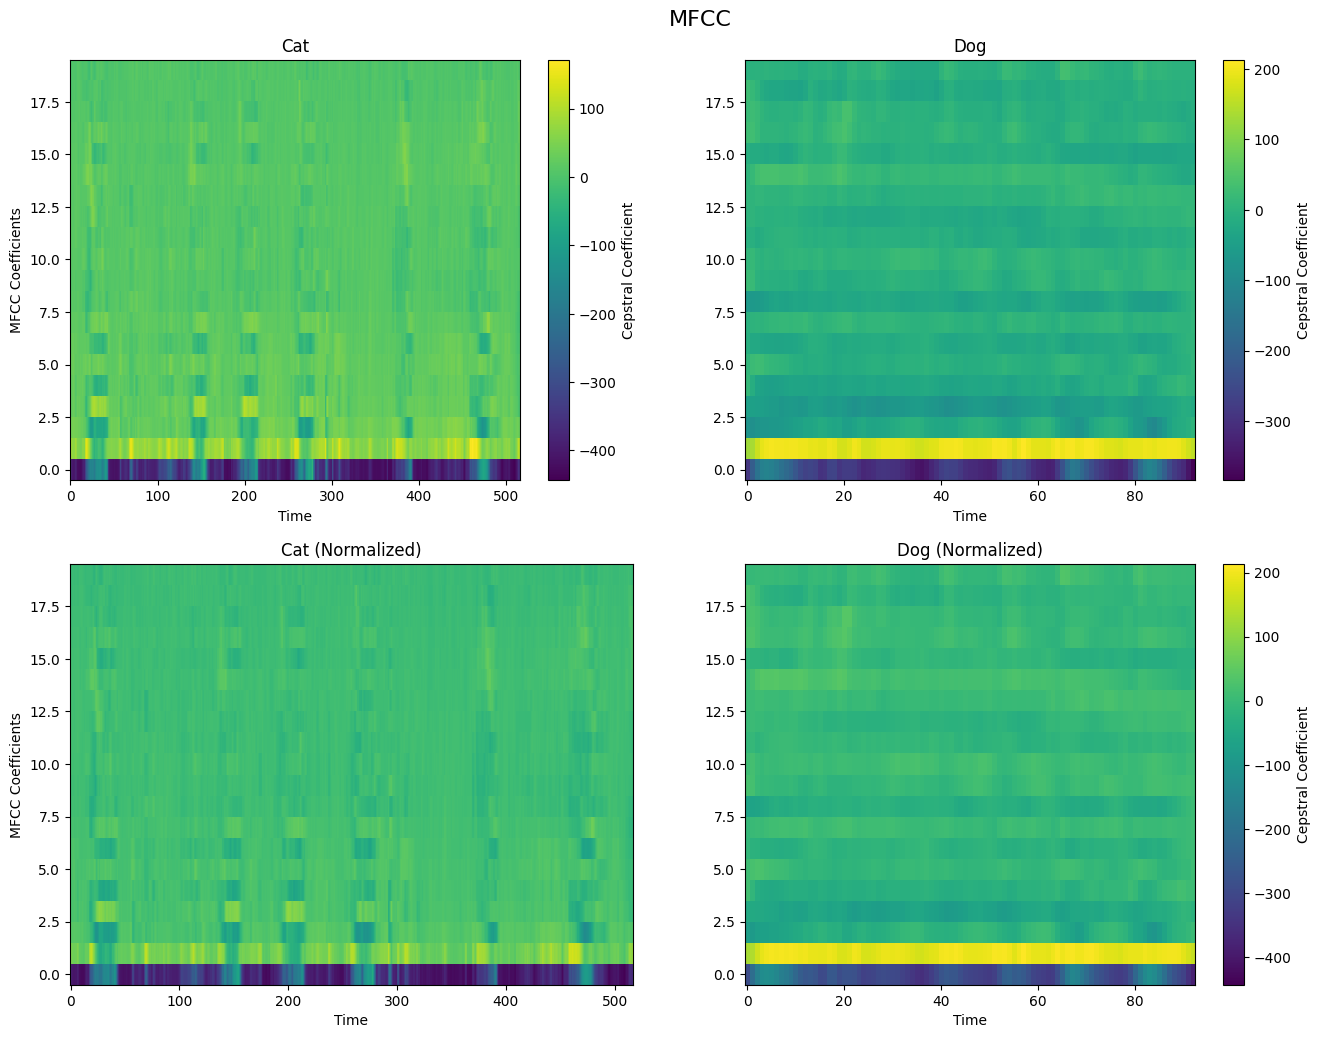

In [9]:
mfcc_cat = get_mfcc(cat_file)
mfcc_dog = get_mfcc(dog_file)
cmap = get_minmax(mfcc_cat, mfcc_dog)

plt.subplots(figsize=(45,10))
plt.subplots_adjust(right=.4, top=0.93, bottom=0.005)
plt.suptitle("MFCC", x=.265, size=16)

sbplt_graph(index=1, title="Cat", label="Cepstral Coefficient", array=mfcc_cat, y="MFCC Coefficients", inv=True)
sbplt_graph(index=2, title="Dog", label="Cepstral Coefficient", array=mfcc_dog, inv=True)
sbplt_graph(index=3, title="Cat (Normalized)", array=mfcc_cat, y="MFCC Coefficients", min=cmap[0], max=cmap[1], inv=True)
sbplt_graph(index=4, title="Dog (Normalized)", label="Cepstral Coefficient", array=mfcc_dog, min=cmap[0], max=cmap[1], inv=True)

plt.show()

### ***Mel-Spectrogram***

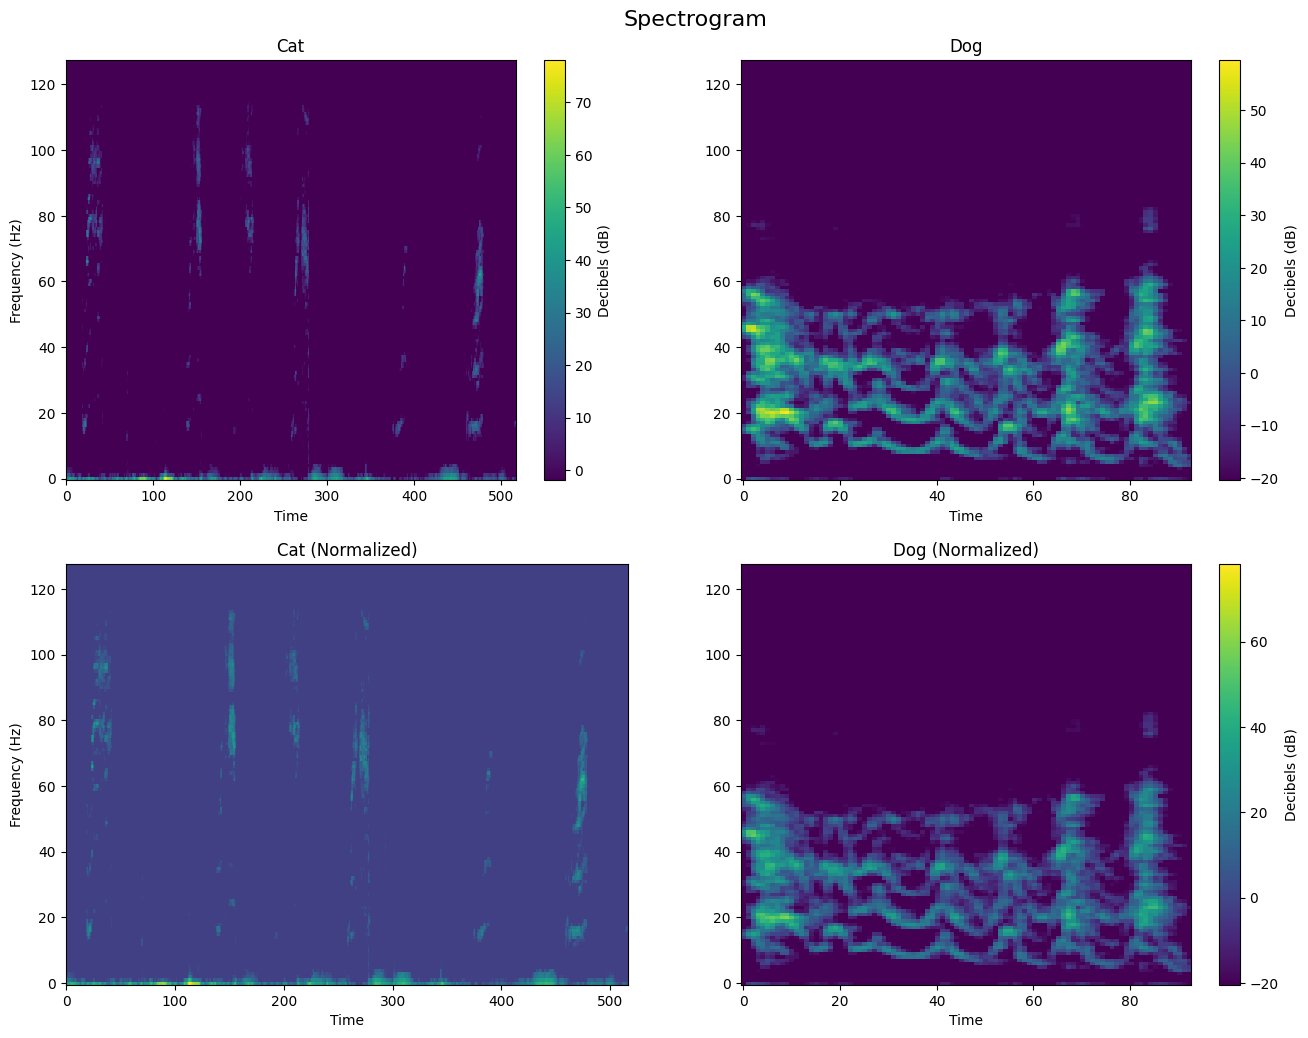

In [10]:
spec_cat = get_melspectrogram(cat_file)
spec_dog = get_melspectrogram(dog_file)

spec_cat = librosa.amplitude_to_db(spec_cat)
spec_dog = librosa.amplitude_to_db(spec_dog)
cmap = get_minmax(spec_cat, spec_dog)

plt.subplots(figsize=(45,10))
plt.subplots_adjust(right=.4, top=0.93, bottom=0.005)
plt.suptitle("Spectrogram", x=.265, size=16)

sbplt_graph(index=1, title="Cat", label="Decibels (dB)", array=spec_cat, y="Frequency (Hz)", inv=True)
sbplt_graph(index=2, title="Dog", label="Decibels (dB)", array=spec_dog, inv=True)
sbplt_graph(index=3, title="Cat (Normalized)", array=spec_cat, y="Frequency (Hz)", min=cmap[0], max=cmap[1], inv=True)
sbplt_graph(index=4, title="Dog (Normalized)", label="Decibels (dB)", array=spec_dog, min=cmap[0], max=cmap[1], inv=True)

plt.show()

### ***Tonnetz***

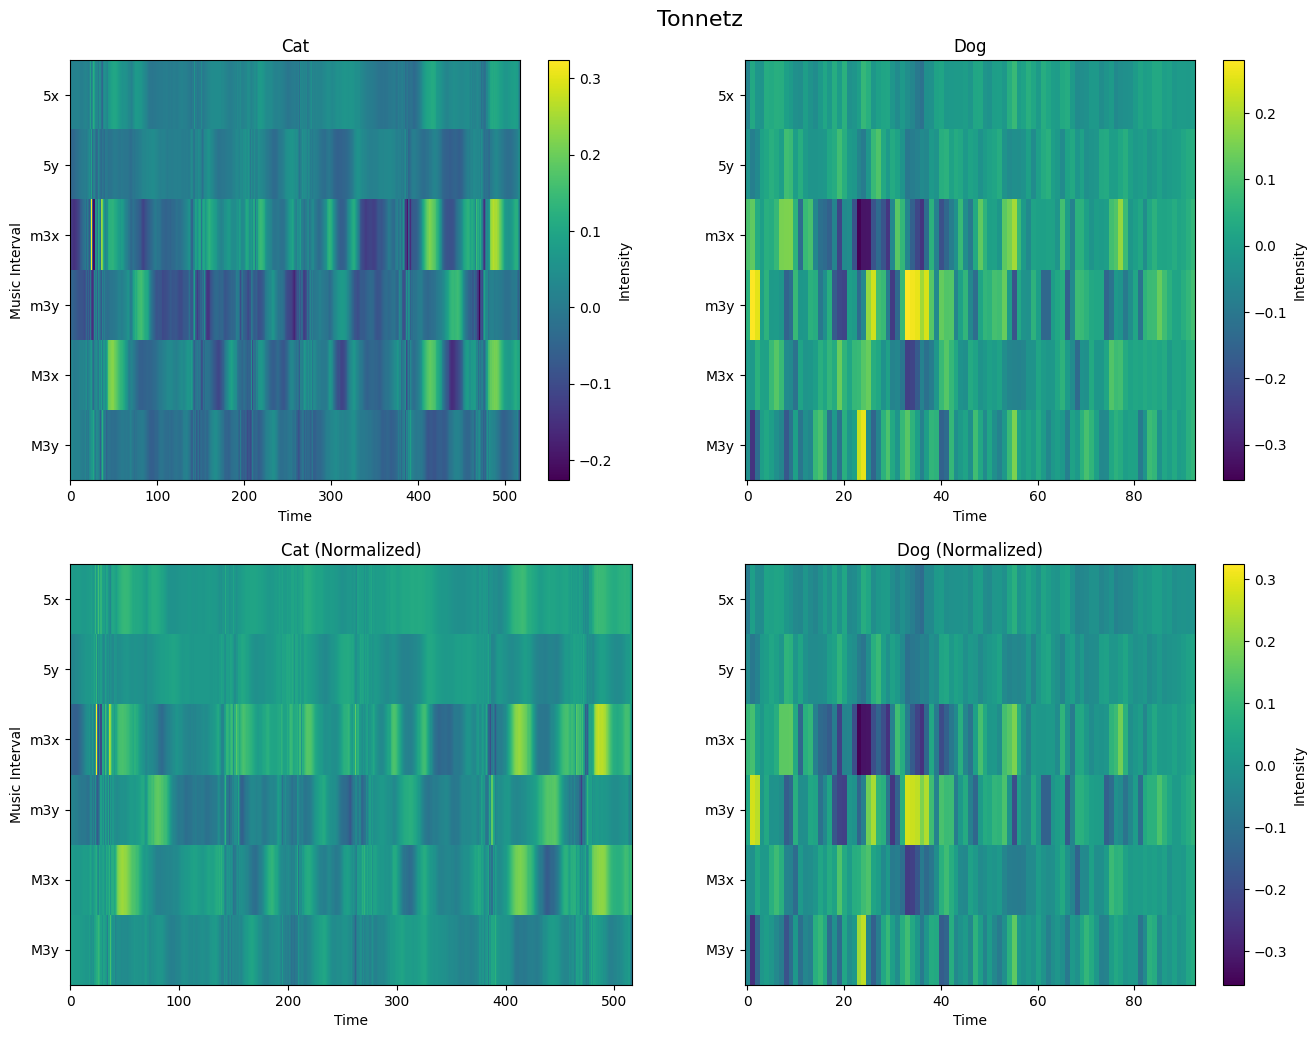

In [11]:
tntz_cat = get_tonnetz(cat_file)
tntz_dog = get_tonnetz(dog_file)
cmap = get_minmax(tntz_cat, tntz_dog)

plt.subplots(figsize=(45,10))
plt.subplots_adjust(right=.4, top=0.93, bottom=0.005)
plt.suptitle("Tonnetz", x=.265, size=16)

sbplt_graph(index=1, title="Cat", ticks=[np.arange(6), 'M3y M3x m3y m3x 5y 5x'.split()], label="Intensity", array=tntz_cat, y="Music Interval", inv=True)
sbplt_graph(index=2, title="Dog", ticks=[np.arange(6), 'M3y M3x m3y m3x 5y 5x'.split()], label="Intensity", array=tntz_dog, inv=True)
sbplt_graph(index=3, title="Cat (Normalized)", ticks=[np.arange(6), 'M3y M3x m3y m3x 5y 5x'.split()], array=tntz_cat, y="Music Interval", min=cmap[0], max=cmap[1], inv=True)
sbplt_graph(index=4, title="Dog (Normalized)", ticks=[np.arange(6), 'M3y M3x m3y m3x 5y 5x'.split()], label="Intensity", array=tntz_dog, min=cmap[0], max=cmap[1], inv=True)

plt.show()

### ***Chromagram***

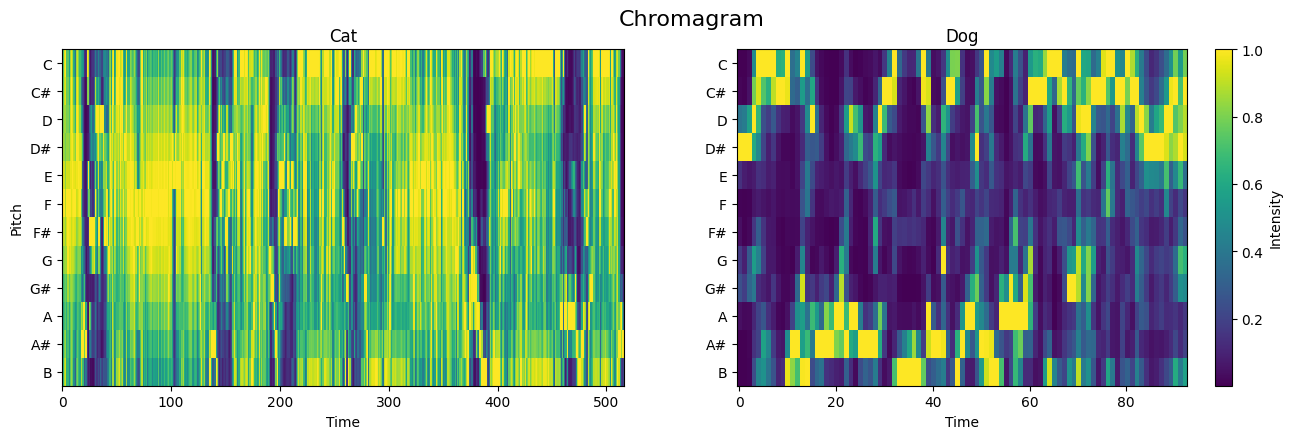

In [12]:
chroma_cat = get_chroma_vector(cat_file)
chroma_dog = get_chroma_vector(dog_file)

plt.subplots(figsize=(45,8))
plt.subplots_adjust(right=.4, top=0.93, bottom=0.005)
plt.suptitle("Chromagram", x=.265, size=16)

sbplt_graph(index=1, title="Cat", ticks=[np.arange(12), 'C C# D D# E F F# G G# A A# B'.split()], array=chroma_cat, y="Pitch")
sbplt_graph(index=2, title="Dog", ticks=[np.arange(12), 'C C# D D# E F F# G G# A A# B'.split()], label="Intensity", array=chroma_dog)

plt.show()

## **Iterating through every audio file and extracting features**


In [13]:
audio_dataset_path = "/content/AUDIO DATASET"
audio_class = os.listdir(audio_dataset_path)

features = []
labels = []

for audio in audio_class:
    sounds = os.path.join(audio_dataset_path, audio)
    for file in os.listdir(sounds):
        file_path = os.path.join(sounds, file)
        feature = get_feature(file_path)
        if feature is None:
            continue
        features.append(feature)
        label = audio_class.index(audio)
        labels.append(label)

## **Shuffling and Splitting the Data**

In [14]:
permutations = np.random.permutation(277)
features = np.array(features)[permutations]
labels = np.array(labels)[permutations]

features_train = features[0:180]
labels_train = labels[0:180]

features_val = features[180:240]
labels_val = labels[180:240]

features_test = features[240:300]
labels_test = labels[240:300]

## **Training the Neural Network Model using TensorFlow**

In [15]:
inputs = keras.Input(shape=(188), name="feature")
x = keras.layers.Dense(300, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(200, activation="relu", name="dense_2")(x)
outputs = keras.layers.Dense(3, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    # Optimizer
    optimizer=keras.optimizers.RMSprop(),
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
model.fit(x=features_train.tolist(),y=labels_train.tolist(),verbose=1,validation_data=(features_val.tolist() , labels_val.tolist()), epochs=300)

Epoch 1/300
6/6 [==============================] - 1s 59ms/step - loss: 36.9073 - sparse_categorical_accuracy: 0.6111 - val_loss: 1.9539 - val_sparse_categorical_accuracy: 0.8167
Epoch 2/300
6/6 [==============================] - 0s 14ms/step - loss: 6.9329 - sparse_categorical_accuracy: 0.7444 - val_loss: 1.8726 - val_sparse_categorical_accuracy: 0.8833
Epoch 3/300
6/6 [==============================] - 0s 13ms/step - loss: 0.3712 - sparse_categorical_accuracy: 0.9667 - val_loss: 2.5877 - val_sparse_categorical_accuracy: 0.8667
Epoch 4/300
6/6 [==============================] - 0s 16ms/step - loss: 2.4359 - sparse_categorical_accuracy: 0.8611 - val_loss: 2.8321 - val_sparse_categorical_accuracy: 0.8500
Epoch 5/300
6/6 [==============================] - 0s 14ms/step - loss: 0.2753 - sparse_categorical_accuracy: 0.9667 - val_loss: 2.3515 - val_sparse_categorical_accuracy: 0.8667
Epoch 6/300
6/6 [==============================] - 0s 15ms/step - loss: 5.5317 - sparse_categorical_accuracy:

## **Accuracy of the Trained Model**

In [16]:
score = model.evaluate(x=features_test.tolist(),y=labels_test.tolist(), verbose=0)
print('Accuracy : ' + str(score[1]*100) + '%')

Accuracy : 89.18918967247009%
